In [26]:
import pickle
import jax
from utils import get_data
import matplotlib.pyplot as plt
import jax.numpy as jnp
import tensorflow_probability.substrates.jax as tfp
from scipy.stats import gaussian_kde
import plotly.express as px
import pandas as pd
tfd = tfp.distributions

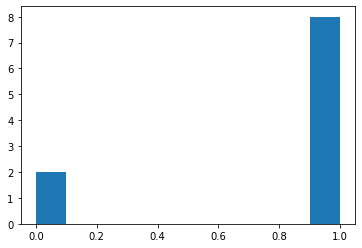

In [3]:
samples, alpha_prior, beta_prior = get_data("coin_toss")
plt.hist(samples)
plt.show()

In [4]:
samples,alpha_prior,beta_prior = get_data("coin_toss")
x = jnp.linspace(0,1,100)
one= jnp.sum(samples==1).astype('float32')
zero= jnp.sum(samples==0).astype('float32')
true_post_dist = tfd.Beta(alpha_prior+one,beta_prior+zero)
true_post_pdf = true_post_dist.prob(x)

In [21]:
with open('results/coin_toss_VI_Ajax_result','rb') as f:
    variational  = pickle.load(f)
ajax_vi_pdf = jnp.exp(variational.log_prob({"theta":x}))

In [46]:
with open('results/MCMC_BlackJAX','rb') as black_f:
    black_samples = pickle.load(black_f)
kde_black = gaussian_kde(black_samples,bw_method=0.3)
pdf_black = kde_black(x)

In [50]:
with open('results/coin_toss_laplace_result','rb') as f:
    laplace_normal  = pickle.load(f)
laplace_pdf = laplace_normal.prob(x)

In [52]:
all_pdfs = jnp.array([true_post_pdf,ajax_vi_pdf,pdf_black,laplace_pdf]).reshape((-1))
all_labels = ["True Posterior"]*x.shape[0]+["Ajax VI estimate"]*x.shape[0]+["Blackjax rmh estimate"]*x.shape[0]+["Laplace approximation"]*x.shape[0]
x_repeated = jnp.tile(x,4)
to_df = {
    "theta":x_repeated,
    "PDF":all_pdfs,
    "label": all_labels

}
df = pd.DataFrame(to_df)

fig = px.line(to_df,"theta","PDF",color="label") 
fig.write_html("coin_toss_results.html")
fig.show()

In [35]:
import plotly.express as px

df = px.data.gapminder().query("continent=='Oceania'")
df


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.120,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.330,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.930,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.100,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.930,13177000,16788.62948,AUS,36
65,Australia,Oceania,1977,73.490,14074100,18334.19751,AUS,36
66,Australia,Oceania,1982,74.740,15184200,19477.00928,AUS,36
67,Australia,Oceania,1987,76.320,16257249,21888.88903,AUS,36
68,Australia,Oceania,1992,77.560,17481977,23424.76683,AUS,36
69,Australia,Oceania,1997,78.830,18565243,26997.93657,AUS,36


In [11]:
fig = px.line(df, x="year", y="lifeExp", color='country')
fig.show()

# Results from Stan

In [ ]:
def plot_samples(samples):
    

